## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
row_num = df.shape[0]
print("Number of rows is: {}".format(row_num))

Number of rows is: 294478


c. The number of unique users in the dataset.

In [4]:
user_total = df.nunique()['user_id']
print("Number of unique users is : {}".format(user_total))

Number of unique users is : 290584


d. The proportion of users converted.

In [5]:
print("Converted users proportion is {}%".format((df['converted'].mean())*100))

Converted users proportion is 11.96591935560551%


In [6]:
sum(df['converted'].values)/row_num

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [7]:
mismatch_grp1 = df.query("group == 'treatment' and landing_page == 'old_page'")
print("Times treatment group user lands incorrectly on old_page is {}".format(len(mismatch_grp1)))

mismatch_grp2 = df.query("group == 'control' and landing_page == 'new_page'")
print("Times control group user incorrectly lands on new_page is {}".format(len(mismatch_grp2)))

print("Times new_page and treatment don't line up is {}".format(len(mismatch_grp1) + len(mismatch_grp2)))

Times treatment group user lands incorrectly on old_page is 1965
Times control group user incorrectly lands on new_page is 1928
Times new_page and treatment don't line up is 3893


f. Do any of the rows have missing values?

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


All seen from above figures, no values are missing.

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz. Store your new dataframe in df2.

In [9]:
df.drop(df.query("group == 'treatment' and landing_page == 'old_page'").index, inplace=True)

df.drop(df.query("group == 'control' and landing_page == 'new_page'").index, inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [11]:
df.to_csv('ab_edited.csv', index=False)

In [12]:
df2 = pd.read_csv('ab_edited.csv')

In [13]:
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [14]:
len(df2['user_id'].unique())

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [15]:
sum(df2['user_id'].duplicated())

1

In [16]:
df2[df2.duplicated(['user_id'], keep=False)]['user_id']

1876    773192
2862    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [17]:
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted
1876,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2862,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [18]:
time_dup = "2017-01-09 05:37:58.781806"
df2 = df2[df2.timestamp != time_dup]

In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 290584
Data columns (total 5 columns):
user_id         290584 non-null int64
timestamp       290584 non-null object
group           290584 non-null object
landing_page    290584 non-null object
converted       290584 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [20]:
len(df['user_id'].unique())

290584

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [21]:
df['converted'].mean()

0.11959667567149027

b. Given that an individual was in the `control` group, what is the probability they converted?

In [22]:
df_grp = df.groupby('group')
df_grp.describe()

converted                                                user_id  \
              count      mean       std  min  25%  50%  75%  max     count   
group                                                                        
control    145274.0  0.120386  0.325414  0.0  0.0  0.0  0.0  1.0  145274.0   
treatment  145311.0  0.118807  0.323563  0.0  0.0  0.0  0.0  1.0  145311.0   

                                                                      \
                    mean           std       min       25%       50%   
group                                                                  
control    788164.072594  91287.914601  630002.0  709279.5  788128.5   
treatment  787845.618446  91161.258854  630000.0  708746.5  787874.0   

                                
                 75%       max  
group                           
control    867208.25  945998.0  
treatment  866718.50  945999.0

Thus, given that an individual was in the control group, the probability they converted is 0.120386

c. Given that an individual was in the `treatment` group, what is the probability they converted?

Thus, given that an individual was in the treatment group, the probability they converted is 0.118807

d. What is the probability that an individual received the new page?

In [23]:
new_user = len(df.query("group == 'treatment'"))

users=df.shape[0]

new_user_p = new_user/users
print(new_user_p)

0.5000636646764286


e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

Given that an individual was in the treatment group, the probability they converted is 0.118807. Given that an individual was in the control group, the probability they converted is 0.120386. We find that old page does better, but by a very tiny margin.
Change aversion, test span durations and other potentially influencing factors are not accounted for. So, we cannot state with certainty that one page leads to more conversions. This is even more important due to almost similar perforamnce of both pages.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [24]:
p_new = df2['converted'].mean()
print(p_new)

0.11959708724499628


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [25]:
p_old = df2['converted'].mean()
print(p_old)

0.11959708724499628


c. What is $n_{new}$?

In [26]:
n_new = len(df2.query("group == 'treatment'"))
print(n_new)

145310


d. What is $n_{old}$?

In [27]:
n_old = len(df2.query("group == 'control'"))
print(n_old)

145274


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [28]:
new_page_converted = np.random.choice([1, 0], size=n_new, p=[p_new, (1-p_new)])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [29]:
old_page_converted = np.random.choice([1, 0], size=n_old, p=[p_old, (1-p_old)])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [30]:
new_page_converted = new_page_converted[:145274]

In [34]:
p_diff = (new_page_converted/n_new) - (old_page_converted/n_old)

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

Here, value of size is different for n_new and n_old. So, computing difference will throw an error. Hence, we use mean function for both old and new page conversion simulations to overcome this problem of shape difference. We are still using probabilities as previous case.

In [35]:
p_diffs = []

for _ in range(10000):
    new_page_converted = np.random.choice([1, 0], size=n_new, p=[p_new, (1-p_new)]).mean()
    old_page_converted = np.random.choice([1, 0], size=n_old, p=[p_old, (1-p_old)]).mean()
    diff = new_page_converted - old_page_converted 
    p_diffs.append(diff)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

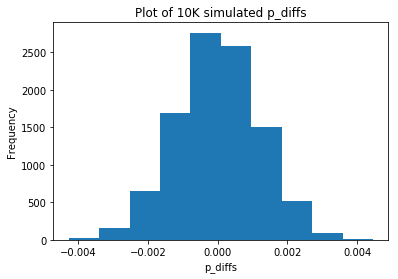

In [36]:
plt.hist(p_diffs)
plt.xlabel('p_diffs')
plt.ylabel('Frequency')
plt.title('Plot of 10K simulated p_diffs');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [37]:
act_diff = df[df['group'] == 'treatment']['converted'].mean() -  df[df['group'] == 'control']['converted'].mean()
act_diff

-0.0015790565976871451

In [38]:
p_diffs = np.array(p_diffs)
p_diffs

array([ 0.002441  ,  0.00054165, -0.00171594, ..., -0.00028416,
       -0.00050436,  0.00101675])

In [39]:
(act_diff < p_diffs).mean()

0.9069

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

We are computing p-values here. As explained in the videos and quizzes, this is the probability of observing our statistic if the null hypothesis is true. The more extreme in favor of the alternative portion of this statement determines the shading associated with your p-value. Here, we find that there is no conversion advantage with new pages. We conclude that null hypothesis is true as old and new pages perform almost similarly. Old pages, as the numbers show, performed slightly better.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [41]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [44]:
import statsmodels.api as sm

convert_old = sum(df2.query("group == 'control'")['converted'])
convert_new = sum(df2.query("group == 'treatment'")['converted'])
n_old = len(df2.query("group == 'control'"))
n_new = len(df2.query("group == 'treatment'"))

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [45]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
print(z_score, p_value)

1.3109241984234394 0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

In [47]:
from scipy.stats import norm

print(norm.cdf(z_score))
 
print(norm.ppf(1-(0.05)))

0.9050583127590245
1.6448536269514722


We find that the z-score of 1.31092419842 is less than the critical value of 1.64485362695. So, we accept the null hypothesis.
As regards the conversion rates of the old and new pages, we find that old pages are only minutely better than new pages.
These values agree with the findings in parts j. and k.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

Logistic Regression

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [48]:
df['intercept']=1
df[['control', 'treatment']] = pd.get_dummies(df['group'])

c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [49]:
import statsmodels.api as sm
logit = sm.Logit(df['converted'],df[['intercept','treatment']])

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [52]:
results = logit.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2018-07-24 23:16 AIC:              212780.6032
No. Observations:   290585           BIC:              212801.7625
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290583           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
treatment    -0.0150    0.0114    -1.3116  0.1897  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

Our hypothesis is:
H0: Pnew - Pold = 0
H1: Pnew - Pold != 0

Apparently the p-value associated with ab_page is 0.1897, which is lower than the p-value I calculated using the z-test above. The reason why the value is lower is because regression is two tailed test. This means that this value is more accurate.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

We should consider other factors into the regression model as they might influence the conversions too. For instance student segments might create change aversion or even, the opposite as a predisposition to conversion. Seasonality like new terms or New years might mean more interest in new skills/ resolutions. Timestamps are inlcuded but without regionality, they do not indicate if seasonality was a factor or not. Factors like device on which tests were taken or course which was looked at, prior academic background, age, might alter experience and ultimately, conversions. These are limitations which should be at least kept in mind while making the final decision. The disadvantages to adding additional terms into the regression model is that even with additional factors we can never account for all influencing factors or accomodate them. Plus, small pilots and pivots sometimes work better in practice than long-drawn research without execution.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [53]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted
user_id,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0


In [54]:
df_new['country'].value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [55]:
### Create the necessary dummy variables
df_new[['CA', 'US']] = pd.get_dummies(df_new['country'])[['CA','US']]

df_new['country'].astype(str).value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [56]:
### Fit Your Linear Model And Obtain the Results
df['intercept'] = 1


log_mod = sm.Logit(df_new['converted'], df_new[['CA', 'US']])
results = log_mod.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.447174
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: -0.221     
Date:               2018-07-24 23:20 AIC:              259887.4421
No. Observations:   290584           BIC:              259908.6014
Df Model:           1                Log-Likelihood:   -1.2994e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
--------------------------------------------------------------------
          Coef.    Std.Err.       z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
CA       -2.0375     0.0260    -78.3639   0.0000   -2.0885   -1.9866
US       -1.9967     0.0068   -292.3145   0.0000   -2.0101   -1.9833
==================================================================

"""

In [57]:
np.exp(results.params)

CA    0.130350
US    0.135779
dtype: float64

In [58]:
1/_

0.00010001000100010001

In [59]:
df.groupby('group').mean()['converted']

group
control      0.120386
treatment    0.118807
Name: converted, dtype: float64

<a id='conclusions'></a>
## Conclusions

Although it would seem from the outset that there is a difference between the conversion rates of new and old pages, there is just not enough evidence to reject the null hypothesis. From the histogram shown in this report, it seems that the new page does worse than the old pa.

It was also found that this was not dependent on countries with conversion rates being roughly the same in the UK as in the US. The test conditions were fairly good as well, users had a roughly 50% chance to recieve the new and old pages and the sample size of the initial dataframe is sufficiently big such that collecting data is likely not a good use of resources.

I would recommend that the e-commerce company spend their money on trying to improve their website before trying again. If anything, perhaps do some reason into why the page performed so poorly.

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.